In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
electrical=pd.read_csv("C:/Users/Owner/Downloads/electrical_engineering_data.csv")

In [36]:
electrical.head()

,Date,Voltage_V,Current_A,Power_kW,Frequency_Hz,Power_Factor,Load_Type
0,2022-01-31,232.483571,10.417727,2.482087,50.051510,0.727931,Inductive
1,2022-02-28,229.308678,6.080660,3.282322,49.985111,0.969165,Inductive
2,2022-03-31,233.238443,7.343628,1.190127,49.616246,0.970125,Resistive
3,2022-04-30,237.615149,10.393722,2.910951,49.994697,0.889930,Capacitive
4,2022-05-31,228.829233,11.476933,2.543524,50.012046,0.801709,Inductive


In [37]:
electrical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36 non-null     object 
 1   Voltage_V     36 non-null     float64
 2   Current_A     36 non-null     float64
 3   Power_kW      36 non-null     float64
 4   Frequency_Hz  36 non-null     float64
 5   Power_Factor  36 non-null     float64
 6   Load_Type     36 non-null     object 
dtypes: float64(5), object(2)
memory usage: 2.1+ KB


In [38]:
electrical['Date'] = pd.to_datetime(electrical['Date'])

In [39]:
avg_voltage = electrical.groupby(['Load_Type','Date'])[['Voltage_V','Current_A']].mean().reset_index()

In [40]:
avg_voltage = avg_voltage.sort_values(['Load_Type','Date'])

In [41]:
avg_voltage

,Load_Type,Date,Voltage_V,Current_A
0,Capacitive,2022-04-30,237.615149,10.393722
1,Capacitive,2022-06-30,228.829315,10.342737
2,Capacitive,2022-07-31,237.896064,9.768703
3,Capacitive,2022-12-31,227.671351,12.114244
4,Capacitive,2023-04-30,227.188562,9.229835
5,Capacitive,2023-05-31,224.935844,8.646156
6,Capacitive,2024-01-31,227.278086,9.041652
7,Capacitive,2024-08-31,239.261391,12.007066
8,Capacitive,2024-09-30,229.932514,10.723272
9,Capacitive,2024-11-30,234.112725,10.722791


In [42]:
avg_power = electrical.groupby('Load_Type')['Power_kW'].mean().reset_index()

In [43]:
avg_power

,Load_Type,Power_kW
0,Capacitive,2.555706
1,Inductive,2.430124
2,Resistive,2.400351


C:\Users\Owner\AppData\Local\Temp\ipykernel_31736\2130391675.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,2].boxplot([electrical[electrical['Load_Type']=="Inductive"]['Frequency_Hz'],electrical[electrical['Load_Type']=="Resistive"]['Frequency_Hz'],electrical[electrical['Load_Type']=="Capacitive"]['Frequency_Hz']],labels=['Inductive', 'Resistive', 'Capacitive'])


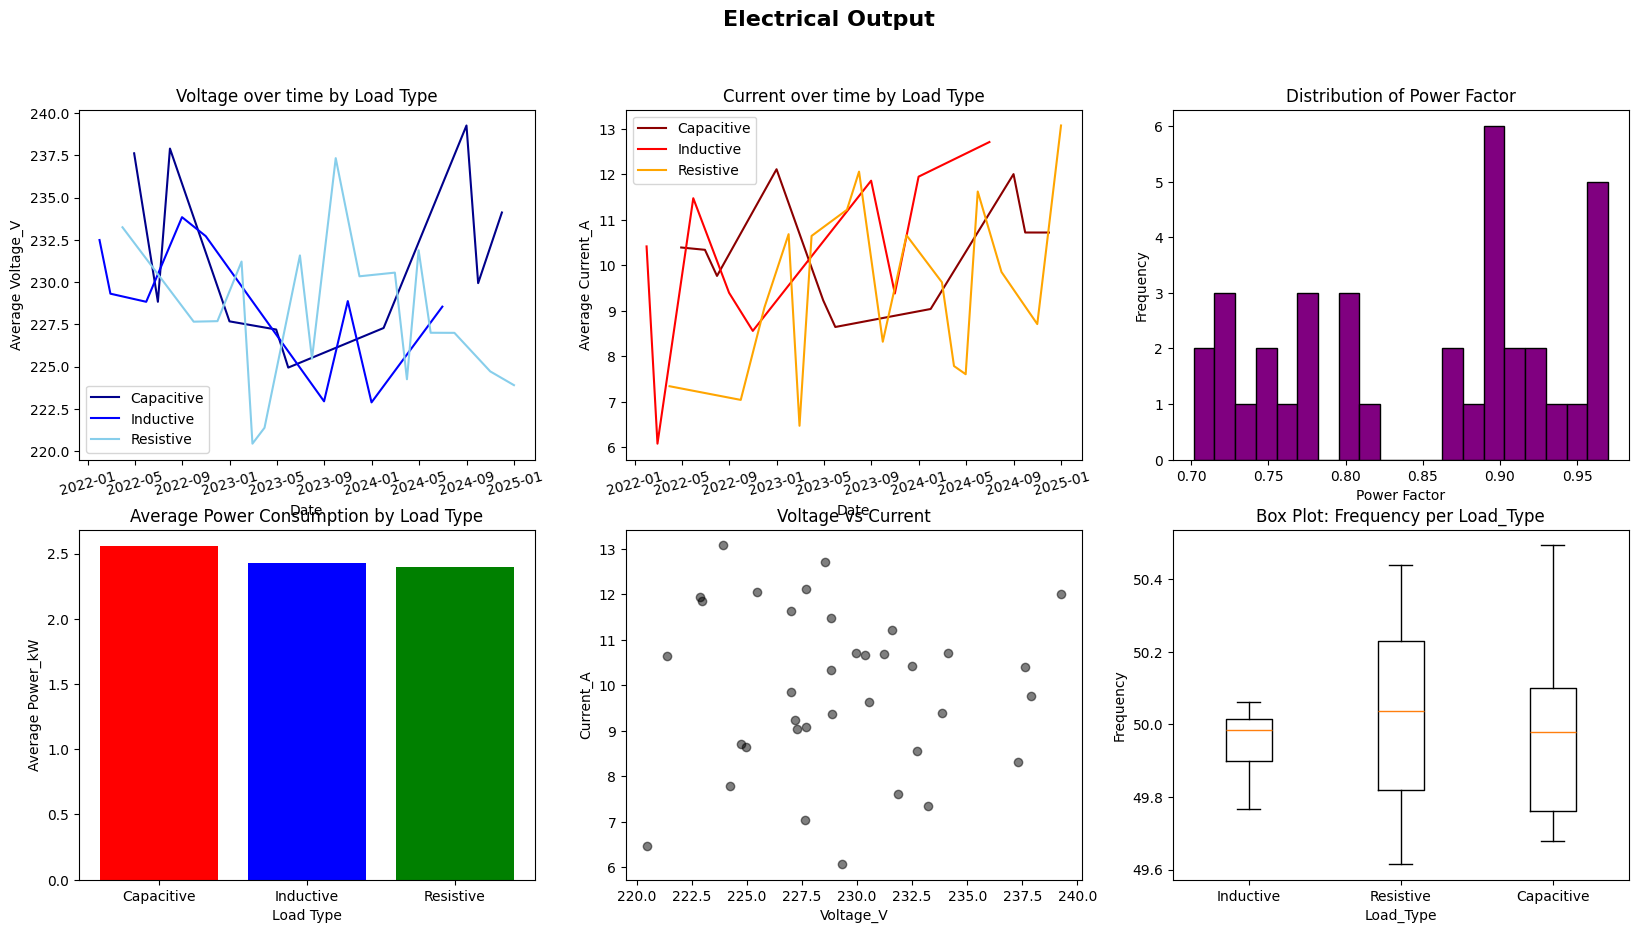

In [44]:
fig,axes=plt.subplots(2,3,figsize=(20,10))

axes[0,0].plot(avg_voltage[avg_voltage['Load_Type']=='Capacitive']['Date'],avg_voltage[avg_voltage['Load_Type']=='Capacitive']['Voltage_V'],color='darkblue')
axes[0,0].plot(avg_voltage[avg_voltage['Load_Type']=='Inductive']['Date'],avg_voltage[avg_voltage['Load_Type']=='Inductive']['Voltage_V'],color='blue')
axes[0,0].plot(avg_voltage[avg_voltage['Load_Type']=='Resistive']['Date'],avg_voltage[avg_voltage['Load_Type']=='Resistive']['Voltage_V'],color='skyblue')

axes[0,0].set_title('Voltage over time by Load Type')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Average Voltage_V')
axes[0,0].legend(['Capacitive','Inductive','Resistive']); axes[0,0].tick_params(axis='x', rotation=15)

axes[0,1].plot(avg_voltage[avg_voltage['Load_Type']=='Capacitive']['Date'],avg_voltage[avg_voltage['Load_Type']=='Capacitive']['Current_A'],color='darkred')
axes[0,1].plot(avg_voltage[avg_voltage['Load_Type']=='Inductive']['Date'],avg_voltage[avg_voltage['Load_Type']=='Inductive']['Current_A'],color='red')
axes[0,1].plot(avg_voltage[avg_voltage['Load_Type']=='Resistive']['Date'],avg_voltage[avg_voltage['Load_Type']=='Resistive']['Current_A'],color='orange')
axes[0,1].set_title('Current over time by Load Type')
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Average Current_A')
axes[0,1].legend(['Capacitive','Inductive','Resistive']); axes[0,1].tick_params(axis='x', rotation=15)


axes[0,2].hist(electrical['Power_Factor'],bins=20,color='purple',edgecolor='black')
axes[0,2].set_title('Distribution of Power Factor')
axes[0,2].set_xlabel('Power Factor')
axes[0,2].set_ylabel('Frequency')

axes[1,0].bar(avg_power['Load_Type'],avg_power['Power_kW'],color=['red','blue','green'])
axes[1,0].set_title('Average Power Consumption by Load Type')
axes[1,0].set_xlabel('Load Type')  
axes[1,0].set_ylabel('Average Power_kW')

axes[1,1].scatter(electrical['Voltage_V'],electrical['Current_A'],alpha=0.5,color='black')
axes[1,1].set_title('Voltage vs Current')
axes[1,1].set_xlabel('Voltage_V')
axes[1,1].set_ylabel('Current_A')

axes[1,2].boxplot([electrical[electrical['Load_Type']=="Inductive"]['Frequency_Hz'],electrical[electrical['Load_Type']=="Resistive"]['Frequency_Hz'],electrical[electrical['Load_Type']=="Capacitive"]['Frequency_Hz']],labels=['Inductive', 'Resistive', 'Capacitive'])
axes[1,2].set_title('Box Plot: Frequency per Load_Type')
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_xlabel('Load_Type')

plt.suptitle('Electrical Output',fontsize=16,fontweight='bold')

plt.savefig("C:/Users/Owner/Desktop/MAPUA 2024-2025/2025/3Y_1T/DATA_SCIENCE/Electrical.png")
